In [138]:
import pandas as pd

Valores nullos

In [139]:
df = pd.read_csv('/content/rest-mex_2022_recommendation_data_training.csv')
# Revisión de valores faltantes
missing_values = df.isnull().sum()

missing_values

Index       0
Gender      0
Place       0
Location    0
Date        0
Type        0
Label       0
dtype: int64

In [140]:
# Verificación de la columna 'Gender'
gender_values = df['Gender'].unique()

gender_values

array(['Male', 'Female', 'N/I'], dtype=object)

In [141]:
# Resumen estadístico y verificación de valores faltantes
summary = df.describe(include='all')
missing_values = df.isnull().sum()

summary, missing_values


(              Index  Gender           Place        Location           Date  \
 count          1582    1582            1582            1582           1582   
 unique         1582       3              18              41            100   
 top     Usuario1221  Female  Islas Marietas  Estados Unidos  marzo de 2016   
 freq              1     845             839             388             64   
 mean            NaN     NaN             NaN             NaN            NaN   
 std             NaN     NaN             NaN             NaN            NaN   
 min             NaN     NaN             NaN             NaN            NaN   
 25%             NaN     NaN             NaN             NaN            NaN   
 50%             NaN     NaN             NaN             NaN            NaN   
 75%             NaN     NaN             NaN             NaN            NaN   
 max             NaN     NaN             NaN             NaN            NaN   
 
           Type        Label  
 count     1582  15

In [142]:
import re
from datetime import datetime
output_file_path=('/content/rest-mex_2022_recommendation_data_training.csv')
# Recargando los datos originales nuevamente
df = pd.read_csv(output_file_path)

# Ajuste en la función de conversión para manejar valores no convertibles sin eliminarlos
def convert_to_year_month_format(date_str):
    # Mapeo de los meses en español a sus números correspondientes
    months_map = {
        "enero": "01",
        "febrero": "02",
        "marzo": "03",
        "abril": "04",
        "mayo": "05",
        "junio": "06",
        "julio": "07",
        "agosto": "08",
        "septiembre": "09",
        "octubre": "10",
        "noviembre": "11",
        "diciembre": "12"
    }

    # Extracción del mes y año
    match = re.search(r"(\w+) de (\d{4})", date_str)
    if match:
        month_spanish, year = match.groups()
        month_number = months_map.get(month_spanish.lower())
        return f"{year}-{month_number}"
    else:
        return None  # Mantener el valor como None si no se puede convertir

# Aplicando la conversión al DataFrame
df['Date'] = df['Date'].apply(convert_to_year_month_format)

# Verificando los cambios realizados
df.head()




,Index,Gender,Place,Location,Date,Type,Label
0,Usuario1221,Male,Islas Marietas,Occidente,2013-12,Family,5
1,Usuario4,Female,Bahia de Matanchen,Centro,2019-04,Friends,5
2,Usuario9,Male,Bahia de Matanchen,Noreste,2014-12,Family,5
3,Usuario870,Male,Islas Marietas,Estados Unidos,2014-12,Alone,5
4,Usuario616,Female,Islas Marietas,Centro,2014-07,Couple,5


In [143]:
# Creando un nuevo DataFrame a partir del DataFrame actual
new_dataframe = df.copy()

# Guardando el nuevo DataFrame como un archivo CSV
output_file_path = '/content/cleaned_recommendation_data.csv'
new_dataframe.to_csv(output_file_path, index=False,sep=';')

output_file_path

'/content/cleaned_recommendation_data.csv'

Codgio limpieza y normalizacion para Places

In [144]:
df_places = pd.read_csv('/content/Places.csv')

df_places.head()

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta,cerca del Río Cuale,a unos metros del malecón,se encuentra esta playa,con una extensión de 2 kilómetros de largo. Es...,NaN,NaN,NaN
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Centro Historico de Tepic,cultural|religioso,La capital del Estado de Nayarit,es una ciudad colonial que se encuentra rodead...,posee riquezas naturales y está llena de cultu...,NaN,NaN,NaN,NaN,NaN
4,Galerias Vallarta,diversion,En Galerías Vallarta contamos con todas las me...,Boutiques,Cine.,NaN,NaN,NaN,NaN,NaN


El siguiente es un cambio para que lea las columnas bien

In [145]:
# Load the dataset
file_path = '/content/Places.csv'
data = pd.read_csv(file_path)

# Concatenate all the columns except the first one to form the 'Description' column
data['Description'] = data.iloc[:, 1:].apply(lambda x: ' | '.join(x.dropna()), axis=1)

# Keep only the first column and the newly created 'Description' column
df_places = data[['Lugar', 'Description']]

# Code for displaying the first few rows of the transformed data
df_places.head()

# This code first concatenates all columns except the first into a single 'Description' column,
# then keeps only the 'Lugar' and 'Description' columns in the final DataFrame.


,Lugar,Description
0,Bahia de Matanchen,Turismo de sol y playa | Se localiza en el mun...
1,Playa Los Muertos,Turismo de sol y playa | En Puerto Vallarta | ...
2,Bucerias Art Walk,cultural|diversion | Hogar de uno de los paseo...
3,Centro Historico de Tepic,cultural|religioso | La capital del Estado de ...
4,Galerias Vallarta,diversion | En Galerías Vallarta contamos con ...


Primero se realiza la transformacion de arriba se guarda con delimitar ; y luego se reemplaza el | por , en la descripcion

In [146]:

# Asegurándose de que df_places es una copia independiente del DataFrame original
df_places = df_places.copy()

# Reemplazando todos los '|' con ',' en la columna 'Description'
df_places['Description'] = df_places['Description'].str.replace('|', ',', regex=False)

# Mostrando las primeras filas del DataFrame modificado para confirmar el cambio
df_places.head()


,Lugar,Description
0,Bahia de Matanchen,"Turismo de sol y playa , Se localiza en el mun..."
1,Playa Los Muertos,"Turismo de sol y playa , En Puerto Vallarta , ..."
2,Bucerias Art Walk,"cultural,diversion , Hogar de uno de los paseo..."
3,Centro Historico de Tepic,"cultural,religioso , La capital del Estado de ..."
4,Galerias Vallarta,"diversion , En Galerías Vallarta contamos con ..."


normalizar no usar por el momento

Crear un csv delimitado por ; para evitar conflictos con las , de los comentarios

In [147]:
# Creando un nuevo DataFrame a partir del DataFrame actual
new_dataframe = df_places.copy()
# Guardando el archivo con un delimitador de punto y coma
output_places_file_path = '/content/Places_semicolon_delimited.csv'

df_places.to_csv(output_places_file_path, sep=';', index=False)

output_places_file_path

'/content/Places_semicolon_delimited.csv'

In [148]:
df_places.head()

,Lugar,Description
0,Bahia de Matanchen,"Turismo de sol y playa , Se localiza en el mun..."
1,Playa Los Muertos,"Turismo de sol y playa , En Puerto Vallarta , ..."
2,Bucerias Art Walk,"cultural,diversion , Hogar de uno de los paseo..."
3,Centro Historico de Tepic,"cultural,religioso , La capital del Estado de ..."
4,Galerias Vallarta,"diversion , En Galerías Vallarta contamos con ..."


Termina normalizacion y limpieza del archivo places


Unir los 2 nuevos csv de place y rest_mex

In [149]:

# Carga de los dos datasets
cleaned_recommendation_data_path = '/content/cleaned_recommendation_data.csv'
places_semicolon_delimited_path = '/content/Places_semicolon_delimited.csv'

# Lectura de los archivos CSV
# Se especifica el separador ';' para el archivo cleaned_recommendation_data
cleaned_recommendation_data = pd.read_csv(cleaned_recommendation_data_path, sep=';')
places_semicolon_delimited = pd.read_csv(places_semicolon_delimited_path, sep=';')

# Renombrar la columna 'Lugar' a 'Place' en places_semicolon_delimited para que coincida con cleaned_recommendation_data
places_semicolon_delimited.rename(columns={'Lugar': 'Place'}, inplace=True)

# Fusión de los dos datasets usando la columna 'Place'
# Se utiliza un join externo (outer) para incluir todas las filas, incluso si no hay coincidencia
merged_data = pd.merge(cleaned_recommendation_data, places_semicolon_delimited, on='Place', how='outer')

# Mostrar las primeras filas del dataset combinado
merged_data.head()


,Index,Gender,Place,Location,Date,Type,Label,Description
0,Usuario1221,Male,Islas Marietas,Occidente,2013-12,Family,5,"Turismo de sol y playa,Aventura,ecoturismo , E..."
1,Usuario870,Male,Islas Marietas,Estados Unidos,2014-12,Alone,5,"Turismo de sol y playa,Aventura,ecoturismo , E..."
2,Usuario616,Female,Islas Marietas,Centro,2014-07,Couple,5,"Turismo de sol y playa,Aventura,ecoturismo , E..."
3,Usuario704,Female,Islas Marietas,Centro,2015-01,Couple,5,"Turismo de sol y playa,Aventura,ecoturismo , E..."
4,Usuario1079,Male,Islas Marietas,Noreste,2016-01,Family,5,"Turismo de sol y playa,Aventura,ecoturismo , E..."


In [150]:
# Creando un nuevo DataFrame a partir del DataFrame actual
new_dataframe = merged_data.copy()
# Guardando el archivo con un delimitador de punto y coma
output_places_file_path = '/content/merged_data_delimited.csv'

merged_data.to_csv(output_places_file_path, sep=';', index=False)

output_places_file_path

'/content/merged_data_delimited.csv'

Inicio limpieza y union de los comentarios de los usuarios

In [151]:
df_users = pd.read_csv('/content/Users/Usuario0.csv')

df_users.head()

,"La playa, sencillamente es hermosa, mis hijos y yo verdaderamente disfrutamos este lugar... Primero tenía cierto temor por lo qie había escuchado del lugar, per...",4.0,Sayulita Beach,4.0.1
0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.0,Balneario Agua Fría,4.0
1,La cerdad vale la pena visitar eate lugar... C...,4.0,Los Molcajetes de Villa,4.5
2,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.0,La Casa de Piedra,4.0
3,Hola amig@s... Este es realmente un buen lugar...,4.0,Zoológico Guadalajara,4.5
4,Es un lugar muy tradicional en Mazatlán... exc...,4.0,El Muchacho Alegre,4.0


In [152]:
import os
# Reescribir el código completo para combinar los archivos CSV

# Path to the folder containing the CSV files
folder_path = '/content/Users/'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame(columns=['Usuario', 'Comentario', 'Puntuacion', 'Lugar', 'Puntuacion Global'])

# Iterate through each file in the folder
for file in os.listdir(folder_path):
    # Check if the file is a CSV file
    if file.endswith('.csv'):
        # Extract the username (without the file extension)
        username = file.split('.')[0]

        # Read the CSV file, selecting only the first four columns
        df = pd.read_csv(os.path.join(folder_path, file), header=None, usecols=[0, 1, 2, 3])

        # Add a new column for the username
        df['Usuario'] = username

        # Rename the columns
        df.columns = ['Comentario', 'Puntuacion', 'Lugar', 'Puntuacion Global', 'Usuario']

        # Reorder the columns
        df = df[['Usuario', 'Comentario', 'Puntuacion', 'Lugar', 'Puntuacion Global']]

        # Append this data to the combined DataFrame
        combined_data = pd.concat([combined_data, df])

# Reset the index of the combined DataFrame
combined_data.reset_index(drop=True, inplace=True)

# Save the combined data to a new CSV file
output_file_path = '/content/combined_data.csv'
combined_data.to_csv(output_file_path, index=False,sep=';')

output_file_path


'/content/combined_data.csv'

In [153]:
# Path to the folder containing the CSV files
folder_path = '/content/Users/'

# Count the number of files in the folder
file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

file_count

1311

Union del primer merge y el csv de todos los comentarios de todos los usuarios

In [154]:
import pandas as pd

# Paths to the CSV files
combined_data_path = '/content/combined_data.csv'
merged_data_delimited_path = '/content/merged_data_delimited.csv'

# Reading the combined_data.csv with updated on_bad_lines argument
combined_data = pd.read_csv(combined_data_path, delimiter=';', on_bad_lines='skip')

# Reading the merged_data_delimited.csv with the correct delimiter and updated on_bad_lines argument
merged_data_delimited = pd.read_csv(merged_data_delimited_path, delimiter=';', on_bad_lines='skip')

# Merging the datasets
merged_data = pd.merge(merged_data_delimited, combined_data, left_on=['Index', 'Place'], right_on=['Usuario', 'Lugar'])

# Displaying the first few rows of the merged dataset (optional)
print(merged_data.head())

# Saving the merged dataset to a new file (optional)
merged_data.to_csv('/content/merged_data.csv', index=False, sep=';')


         Index  Gender           Place        Location     Date    Type  \
0  Usuario1221    Male  Islas Marietas       Occidente  2013-12  Family   
1   Usuario870    Male  Islas Marietas  Estados Unidos  2014-12   Alone   
2   Usuario616  Female  Islas Marietas          Centro  2014-07  Couple   
3  Usuario1079    Male  Islas Marietas         Noreste  2016-01  Family   
4   Usuario492    Male  Islas Marietas          Centro  2016-03  Family   

   Label                                        Description      Usuario  \
0      5  Turismo de sol y playa,Aventura,ecoturismo , E...  Usuario1221   
1      5  Turismo de sol y playa,Aventura,ecoturismo , E...   Usuario870   
2      5  Turismo de sol y playa,Aventura,ecoturismo , E...   Usuario616   
3      5  Turismo de sol y playa,Aventura,ecoturismo , E...  Usuario1079   
4      5  Turismo de sol y playa,Aventura,ecoturismo , E...   Usuario492   

                                          Comentario  Puntuacion  \
0  Las Marietas son una 

In [155]:
merged_data = pd.read_csv('/content/merged_data.csv', delimiter=';')  # Replace ';' with the correct delimiter
merged_data.head()


,Index,Gender,Place,Location,Date,Type,Label,Description,Usuario,Comentario,Puntuacion,Lugar,Puntuacion Global
0,Usuario1221,Male,Islas Marietas,Occidente,2013-12,Family,5,"Turismo de sol y playa,Aventura,ecoturismo , E...",Usuario1221,Las Marietas son una experiencia increible per...,5.0,Islas Marietas,4.5
1,Usuario870,Male,Islas Marietas,Estados Unidos,2014-12,Alone,5,"Turismo de sol y playa,Aventura,ecoturismo , E...",Usuario870,Took a trip to Marietas with friends and famil...,2.0,Islas Marietas,4.5
2,Usuario616,Female,Islas Marietas,Centro,2014-07,Couple,5,"Turismo de sol y playa,Aventura,ecoturismo , E...",Usuario616,Las Marietas son una experiencia increible per...,5.0,Islas Marietas,4.5
3,Usuario1079,Male,Islas Marietas,Noreste,2016-01,Family,5,"Turismo de sol y playa,Aventura,ecoturismo , E...",Usuario1079,Las Marietas son una experiencia increible per...,5.0,Islas Marietas,4.5
4,Usuario492,Male,Islas Marietas,Centro,2016-03,Family,5,"Turismo de sol y playa,Aventura,ecoturismo , E...",Usuario492,Uno de los lugares más bellos del mundo. Hay q...,5.0,Islas Marietas,4.5


Limpieza para el datset del sistema

In [156]:
import unicodedata

# Función para detectar caracteres extraños
def detectar_caracteres_extranos(texto):
    caracteres_extranos = []
    for caracter in texto:
        if ord(caracter) > 127:
            caracteres_extranos.append(caracter)
    return caracteres_extranos

# Función para limpiar texto
def limpiar_texto(texto):
    texto_normalizado = unicodedata.normalize('NFKC', texto)
    return texto_normalizado

# Cargando el dataset
file_path = '/content/merged_data.csv'
dataset = pd.read_csv(file_path, delimiter=';')

# Revisando caracteres extraños
columnas_revisar = ['Description', 'Comentario']
caracteres_extranos_unicos = set()

for columna in columnas_revisar:
    for texto in dataset[columna].dropna():
        caracteres_extranos = detectar_caracteres_extranos(texto)
        caracteres_extranos_unicos.update(caracteres_extranos)

# Limpiando el dataset
for columna in columnas_revisar:
    dataset[columna] = dataset[columna].astype(str).apply(limpiar_texto)

# Guardando el dataset limpio
new_file_path = '/content/merged_data_cleaned.csv'
dataset.to_csv(new_file_path, sep=';', index=False)

# Ruta del archivo guardado
print(f'Archivo guardado: {new_file_path}')
print(dataset.head())

Archivo guardado: /content/merged_data_cleaned.csv
         Index  Gender           Place        Location     Date    Type  \
0  Usuario1221    Male  Islas Marietas       Occidente  2013-12  Family   
1   Usuario870    Male  Islas Marietas  Estados Unidos  2014-12   Alone   
2   Usuario616  Female  Islas Marietas          Centro  2014-07  Couple   
3  Usuario1079    Male  Islas Marietas         Noreste  2016-01  Family   
4   Usuario492    Male  Islas Marietas          Centro  2016-03  Family   

   Label                                        Description      Usuario  \
0      5  Turismo de sol y playa,Aventura,ecoturismo , E...  Usuario1221   
1      5  Turismo de sol y playa,Aventura,ecoturismo , E...   Usuario870   
2      5  Turismo de sol y playa,Aventura,ecoturismo , E...   Usuario616   
3      5  Turismo de sol y playa,Aventura,ecoturismo , E...  Usuario1079   
4      5  Turismo de sol y playa,Aventura,ecoturismo , E...   Usuario492   

                                         

In [157]:
# Cargando el dataset
file_path = '/content/merged_data_cleaned.csv'
dataset_clean = pd.read_csv(file_path, delimiter=';')
print(dataset_clean)

           Index  Gender                      Place        Location     Date  \
0    Usuario1221    Male             Islas Marietas       Occidente  2013-12   
1     Usuario870    Male             Islas Marietas  Estados Unidos  2014-12   
2     Usuario616  Female             Islas Marietas          Centro  2014-07   
3    Usuario1079    Male             Islas Marietas         Noreste  2016-01   
4     Usuario492    Male             Islas Marietas          Centro  2016-03   
..           ...     ...                        ...             ...      ...   
481   Usuario246  Female              Isla de Coral          Centro  2016-02   
482   Usuario250    Male              Isla de Coral  Estados Unidos  2016-12   
483   Usuario253  Female              Isla de Coral         Noreste  2017-04   
484   Usuario236    Male              Isla de Coral          Canada  2017-03   
485   Usuario121    Male  Centro Historico de Tepic         Noreste  2018-05   

        Type  Label                    

In [158]:
# Cargar el archivo
file_path = '/content/merged_data_cleaned.csv'
df = pd.read_csv(file_path, delimiter=';')

# Eliminar la columna 'Usuario'
df.drop('Usuario', axis=1, inplace=True)
df.drop('Lugar', axis=1, inplace=True)

# Función para determinar si es extranjero o mexicano
# Modificando la función 'etiquetar' según las nuevas instrucciones

def etiquetar_modificada(location):
    # Lista de ubicaciones que clasificarán como 'Mexicano'
    ubicaciones_mexicanas = ['noreste', 'noroeste', 'centro', 'occidente', 'sureste']

    # Comprobar si la ubicación está en la lista
    if location.lower() in ubicaciones_mexicanas:
        return 'Mexicano'
    else:
        return 'Extranjero'

# Aplicar la función modificada para crear la columna 'Etiqueta'
df['Etiqueta'] = df['Location'].apply(etiquetar_modificada)

print(df)


           Index  Gender                      Place        Location     Date  \
0    Usuario1221    Male             Islas Marietas       Occidente  2013-12   
1     Usuario870    Male             Islas Marietas  Estados Unidos  2014-12   
2     Usuario616  Female             Islas Marietas          Centro  2014-07   
3    Usuario1079    Male             Islas Marietas         Noreste  2016-01   
4     Usuario492    Male             Islas Marietas          Centro  2016-03   
..           ...     ...                        ...             ...      ...   
481   Usuario246  Female              Isla de Coral          Centro  2016-02   
482   Usuario250    Male              Isla de Coral  Estados Unidos  2016-12   
483   Usuario253  Female              Isla de Coral         Noreste  2017-04   
484   Usuario236    Male              Isla de Coral          Canada  2017-03   
485   Usuario121    Male  Centro Historico de Tepic         Noreste  2018-05   

        Type  Label                    

In [159]:
# Guardar el dataframe modificado en un nuevo archivo CSV
modified_file_path = '/content/modified_dataset.csv'
df.to_csv(modified_file_path, sep=';', index=False)

In [160]:
!pip install transformers

Usar esta y no la anterior

In [161]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Cargar tu archivo CSV
df = pd.read_csv('/content/modified_dataset.csv', delimiter=';')

# Cargar el modelo y el tokenizador
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"  # Este modelo ofrece puntuaciones
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Función para calcular la puntuación de sentimiento
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) - 2

# Aplicar la función a la columna "Comentario"
df['SentimientoComentario'] = df['Comentario'].apply(sentiment_score)

# Normalizar las puntuaciones al rango deseado (-1 a 1)
df['SentimientoComentario'] = df['SentimientoComentario'] / 2.0

# Muestra el DataFrame
print(df.head())


         Index  Gender           Place        Location     Date    Type  \
0  Usuario1221    Male  Islas Marietas       Occidente  2013-12  Family   
1   Usuario870    Male  Islas Marietas  Estados Unidos  2014-12   Alone   
2   Usuario616  Female  Islas Marietas          Centro  2014-07  Couple   
3  Usuario1079    Male  Islas Marietas         Noreste  2016-01  Family   
4   Usuario492    Male  Islas Marietas          Centro  2016-03  Family   

   Label                                        Description  \
0      5  Turismo de sol y playa,Aventura,ecoturismo , E...   
1      5  Turismo de sol y playa,Aventura,ecoturismo , E...   
2      5  Turismo de sol y playa,Aventura,ecoturismo , E...   
3      5  Turismo de sol y playa,Aventura,ecoturismo , E...   
4      5  Turismo de sol y playa,Aventura,ecoturismo , E...   

                                          Comentario  Puntuacion  \
0  Las Marietas son una experiencia increible per...         5.0   
1  Took a trip to Marietas with fr

In [163]:
df = df.astype(str).replace('\.', ',', regex=True)

In [164]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('archivo_listo.csv', index=False, sep=';')

Modelo Modelo Modelo MOdelol modleo

In [167]:
# Modificar el código para retirar el manejo de valores faltantes y llamar al archivo CSV original nuevamente
data = pd.read_csv('/content/archivo_listo.csv', delimiter=';')

# Convertir Puntuacion y SentimientoComentario a numérico (reemplazando comas por puntos)
data['Puntuacion'] = pd.to_numeric(data['Puntuacion'].str.replace(',', '.'))
data['SentimientoComentario'] = pd.to_numeric(data['SentimientoComentario'].str.replace(',', '.'))

# 2. Normalización de Características Numéricas
# Lista de características numéricas
numeric_features = ['Puntuacion', 'SentimientoComentario']

# 3. Codificación de Variables Categóricas
# Lista de características categóricas
categorical_features = ['Gender', 'Place', 'Location', 'Type']

# Construir un preprocesador compuesto para realizar la normalización y codificación
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 4. Preparación de Datos de Texto para NLP
# Limpieza básica de texto
data['Comentario'] = data['Comentario'].str.lower()  # convertir a minúsculas
data['Comentario'] = data['Comentario'].str.replace('[^\w\s]', '')  # eliminar puntuación

# Aplicar el preprocesador a los datos (sin manejo de valores faltantes)
data_preprocessed = preprocessor.fit_transform(data)

# Mostrar los primeros 5 registros después de la preparación
print(data_preprocessed[:5])

  (0, 0)	0.46880723093849525
  (0, 1)	-0.6104327587620886
  (0, 3)	1.0
  (0, 6)	1.0
  (0, 23)	1.0
  (0, 36)	1.0
  (1, 0)	-3.3285313396633174
  (1, 1)	-1.5346393654859984
  (1, 3)	1.0
  (1, 6)	1.0
  (1, 17)	1.0
  (1, 33)	1.0
  (2, 0)	0.46880723093849525
  (2, 1)	-0.6104327587620886
  (2, 2)	1.0
  (2, 6)	1.0
  (2, 11)	1.0
  (2, 35)	1.0
  (3, 0)	0.46880723093849525
  (3, 1)	-0.6104327587620886
  (3, 3)	1.0
  (3, 6)	1.0
  (3, 21)	1.0
  (3, 36)	1.0
  (4, 0)	0.46880723093849525
  (4, 1)	1.237980454685731
  (4, 3)	1.0
  (4, 6)	1.0
  (4, 11)	1.0
  (4, 36)	1.0


<ipython-input-167-07cedd80c118>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Comentario'] = data['Comentario'].str.replace('[^\w\s]', '')  # eliminar puntuación


In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Tokenización y Limpieza de Texto
# Ya se realizó una limpieza básica en los pasos anteriores

# 2. Vectorización de Texto
# Usaremos TF-IDF para convertir los comentarios a un formato numérico
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
text_features = tfidf_vectorizer.fit_transform(data['Comentario'])

# 3. Integración de Características Textuales con Otras Características
# Combinar las características de texto (TF-IDF) con las características preprocesadas anteriores
import scipy.sparse as sp
final_features = sp.hstack((data_preprocessed, text_features))

# Mostrar las dimensiones de las características finales
final_features.shape


(486, 138)

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. División de Datos
X_train, X_test, y_train, y_test = train_test_split(final_features, data['Label'], test_size=0.2, random_state=42)

# 2. Selección del Modelo
# Usaremos un clasificador de bosque aleatorio, que es un buen punto de partida para problemas de clasificación
model = RandomForestClassifier(random_state=42)

# 3. Entrenamiento del Modelo
model.fit(X_train, y_train)

# 4. Evaluación del Modelo
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento del modelo
performance_report = classification_report(y_test, y_pred)

performance_report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         5\n           2       0.00      0.00      0.00         3\n           3       0.50      0.07      0.12        14\n           4       0.41      0.52      0.46        27\n           5       0.64      0.80      0.71        49\n\n    accuracy                           0.55        98\n   macro avg       0.31      0.28      0.26        98\nweighted avg       0.50      0.55      0.50        98\n'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

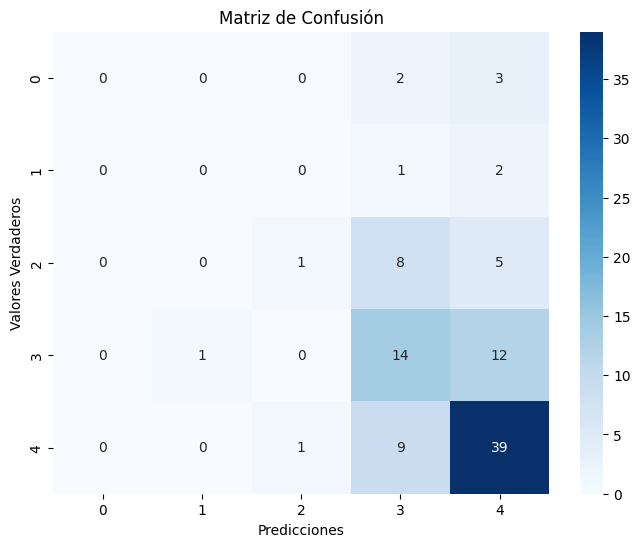

('              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         5\n           2       0.00      0.00      0.00         3\n           3       0.50      0.07      0.12        14\n           4       0.41      0.52      0.46        27\n           5       0.64      0.80      0.71        49\n\n    accuracy                           0.55        98\n   macro avg       0.31      0.28      0.26        98\nweighted avg       0.50      0.55      0.50        98\n',
 0.5510204081632653,
 0.504546080727373,
 0.5510204081632653,
 0.4988662976367895)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Asumiendo que 'final_features' y 'data['Label']' están definidos y contienen los datos de características y etiquetas

# 1. División de Datos
X_train, X_test, y_train, y_test = train_test_split(final_features, data['Label'], test_size=0.2, random_state=42)

# 2. Selección y Entrenamiento del Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Realizar Predicciones y Evaluar Rendimiento
y_pred = model.predict(X_test)
performance_report = classification_report(y_test, y_pred)

# 4. Calculamos las métricas de rendimiento adicionales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 5. Creación y Visualización de la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

performance_report, accuracy, precision, recall, f1


Para esto, utilizaremos una técnica llamada búsqueda en cuadrícula (Grid Search) con validación cruzada, que prueba sistemáticamente una serie de combinaciones de hiperparámetros y evalúa su rendimiento.

In [170]:
from sklearn.model_selection import GridSearchCV

# Definición de los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Máxima profundidad de los árboles
    'min_samples_split': [2, 5, 10]  # Número mínimo de muestras necesarias para dividir un nodo
}

# Crear el modelo de búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Realizar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score



({'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50},
 0.633966033966034)

El modelo reentrenado con los hiperparámetros óptimos ha sido evaluado en el conjunto de prueba.

In [171]:
# Reentrenamiento del modelo con los hiperparámetros óptimos
model_optimized = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=10,
    random_state=42
)

# Entrenamiento del modelo
model_optimized.fit(X_train, y_train)

# Evaluación del modelo reentrenado en el conjunto de prueba
y_pred_optimized = model_optimized.predict(X_test)

# Informe de rendimiento
performance_report_optimized = classification_report(y_test, y_pred_optimized)

performance_report_optimized



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         5\n           2       0.00      0.00      0.00         3\n           3       0.00      0.00      0.00        14\n           4       0.45      0.56      0.50        27\n           5       0.66      0.88      0.75        49\n\n    accuracy                           0.59        98\n   macro avg       0.22      0.29      0.25        98\nweighted avg       0.46      0.59      0.51        98\n'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


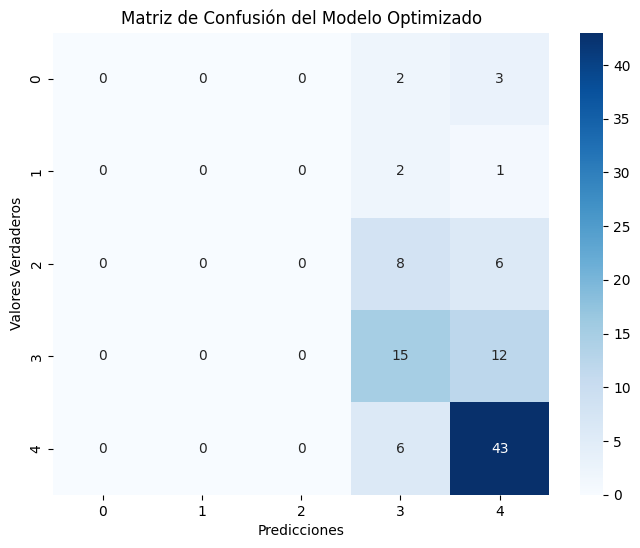

(0.5918367346938775,
 0.45600114171542744,
 0.5918367346938775,
 0.5149480844969566)

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que las variables 'y_test' y 'y_pred_optimized' contienen los valores verdaderos y las predicciones del modelo optimizado

# Calculamos las métricas de rendimiento para el modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')

# Creación de la Matriz de Confusión para el modelo optimizado
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión del Modelo Optimizado')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

accuracy_optimized, precision_optimized, recall_optimized, f1_optimized


profundizaremos en la extracción de características mejorada utilizando técnicas más avanzadas de procesamiento de NLP. El objetivo es capturar de manera más efectiva la información contenida en los comentarios y descripciones, lo cual podría mejorar significativamente el rendimiento del modelo de recomendación. Aquí están los enfoques que exploraremos:

In [172]:
from transformers import BertTokenizer, BertModel
import torch

# Inicialización del tokenizador y modelo BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

def bert_embeddings(text):
    """
    Función para obtener embeddings de BERT para un texto dado.
    """
    # Tokenizar y preparar los inputs
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Obtener embeddings del modelo BERT
    outputs = model_bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Aplicar BERT para obtener embeddings de los comentarios
bert_features = torch.stack([torch.tensor(bert_embeddings(comment)) for comment in data['Comentario']])

# Mostrar las dimensiones de los nuevos features
bert_features.shape



torch.Size([486, 1, 768])

el siguiente paso es integrarlas con tus características numéricas y categóricas preprocesadas y luego utilizar este conjunto de características combinado para entrenar y evaluar tu modelo de recomendación.

In [173]:
import numpy as np

# Convertir los embeddings de BERT a un formato compatible (NumPy Array)
bert_features_np = bert_features.squeeze().numpy()

# Combinar los embeddings de BERT con las otras características preprocesadas
# Para este ejemplo, supongamos que 'data_preprocessed' contiene tus características numéricas y categóricas preprocesadas
combined_features = np.hstack((data_preprocessed.toarray(), bert_features_np))

# División de Datos
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    combined_features,
    data['Label'],
    test_size=0.2,
    random_state=42
)

# Reentrenamiento del modelo con las nuevas características combinadas
model_optimized.fit(X_train_combined, y_train_combined)

# Evaluación del modelo reentrenado
y_pred_combined = model_optimized.predict(X_test_combined)
performance_report_combined = classification_report(y_test_combined, y_pred_combined)

performance_report_combined



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         5\n           2       0.00      0.00      0.00         3\n           3       0.00      0.00      0.00        14\n           4       0.50      0.33      0.40        27\n           5       0.57      0.92      0.70        49\n\n    accuracy                           0.55        98\n   macro avg       0.21      0.25      0.22        98\nweighted avg       0.42      0.55      0.46        98\n'

Metricas *1* Aplicar Métricas al Modelo Propuesto

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


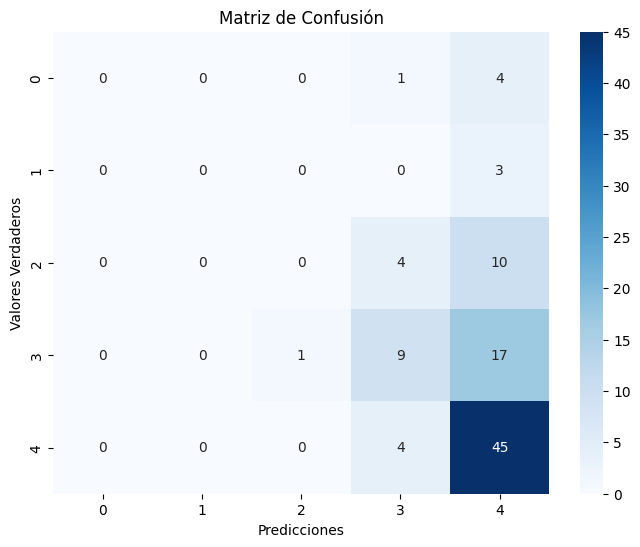

(0.5510204081632653,
 0.42256522862309487,
 0.5510204081632653,
 0.46176658163265316)

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos las métricas de rendimiento
accuracy = accuracy_score(y_test_combined, y_pred_combined)
precision = precision_score(y_test_combined, y_pred_combined, average='weighted')
recall = recall_score(y_test_combined, y_pred_combined, average='weighted')
f1 = f1_score(y_test_combined, y_pred_combined, average='weighted')

# Creación de la Matriz de Confusión
conf_matrix = confusion_matrix(y_test_combined, y_pred_combined)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

# Resultados de las métricas
accuracy, precision, recall, f1



Interpretación de la Matriz de Confusión:
Filas (Valores Verdaderos): Representan las clases reales de los datos de prueba.
Columnas (Predicciones): Representan las clases predichas por el modelo.
Diagonal Principal: Muestra el número de predicciones correctas para cada clase (verdaderos positivos).
Fuera de la Diagonal Principal: Representa los casos en los que el modelo ha hecho una predicción incorrecta (falsos positivos y falsos negativos).
Observaciones específicas:

El modelo predijo correctamente 45 instancias de la clase '5', lo que sugiere que es la clase con mejor desempeño.
Para la clase '4', el modelo predijo correctamente 9 instancias, pero hubo 4 instancias que el modelo clasificó incorrectamente como '5'.
Las clases '1', '2' y '3' tienen muy pocas o ninguna predicción correcta, lo que indica que el modelo tiene dificultades con estas clases. Esto puede ser un indicador de desbalance de clases en el conjunto de datos.
Interpretación de las Métricas:
Exactitud (Accuracy): Aproximadamente el 55.10% de todas las predicciones fueron correctas.
Precisión (Precision): Cuando el modelo predice una clase, es correcto aproximadamente el 42.26% del tiempo.
Recall: El modelo identifica correctamente aproximadamente el 55.10% de todas las instancias positivas.
F1-Score: Es una medida de la precisión y el recall. En este caso, es aproximadamente 0.4617, lo que sugiere que hay un equilibrio relativamente bajo entre la precisión y el recall del modelo.
Conclusiones:
El modelo muestra un buen rendimiento al predecir la clase '5', pero es menos efectivo con las demás clases.
El bajo rendimiento en las clases '1', '2' y '3' puede deberse a un desbalance en el conjunto de datos, donde estas clases pueden estar subrepresentadas.
La precisión y el F1-Score bajos sugieren que hay margen de mejora, particularmente en la capacidad del modelo para manejar clases menos representadas o más difíciles de diferenciar.

In [175]:
# Predicciones con el conjunto de prueba
y_pred_test = model_optimized.predict(X_test_combined)

# Análisis de los resultados de la prueba
# Comparación de las predicciones con los valores reales
print("Predicciones:", y_pred_test)
print("Valores verdaderos:", y_test_combined)

# Obtener una visión general del rendimiento del modelo en cada clase
from sklearn.metrics import classification_report
print(classification_report(y_test_combined, y_pred_test))


Predicciones: [4 5 4 5 5 5 5 5 4 5 5 5 5 5 3 4 5 5 5 5 5 5 4 5 5 5 4 5 5 5 5 4 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 4 4 5 5 5 5 5 5 5 5 5 4 5 4 5 5 5 5 5 5 5 4 5 5 5 5 5
 4 5 4 5 4 4 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Valores verdaderos: 420    3
262    4
431    3
448    3
364    4
      ..
353    4
323    4
299    4
271    4
414    3
Name: Label, Length: 98, dtype: int64
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        14
           4       0.50      0.33      0.40        27
           5       0.57      0.92      0.70        49

    accuracy                           0.55        98
   macro avg       0.21      0.25      0.22        98
weighted avg       0.42      0.55      0.46        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicciones vs. Valores Verdaderos:

Las predicciones del modelo están fuertemente sesgadas hacia las clases '4' y '5', con una tendencia a predecir '5' la mayoría de las veces.
Los valores verdaderos muestran una distribución más uniforme entre las clases '3', '4' y '5', con algunas instancias pertenecientes a las clases '1' y '2'.
Métricas de Rendimiento:

Precisión: Para las clases '4' y '5', es del 50% y 57%, respectivamente, lo que significa que cuando el modelo predice estas clases, es correcto la mitad del tiempo para '4' y algo más de la mitad para '5'.
Recall: El modelo tiene un recall de 0% para las clases '1', '2' y '3', lo que significa que no identificó correctamente ninguna de las instancias verdaderas para estas clases. Para las clases '4' y '5', los valores de recall son del 33% y 92%, respectivamente, lo que indica que el modelo es capaz de identificar la mayoría de las instancias de la clase '5', pero no así para la clase '4'.
F1-Score: Los valores de F1-Score son bajos para todas las clases excepto para la '5'. El F1-Score es una media armónica de la precisión y el recall, y un valor bajo indica que el modelo no está equilibrado en términos de precisión y recall.
Exactitud (Accuracy):

La exactitud global es del 55%, lo que indica que más de la mitad de las predicciones totales fueron correctas. Sin embargo, esta métrica puede ser engañosa debido al desbalance entre las clases.
Inferencias y Conclusiones:
El modelo está claramente sesgado hacia las clases con más datos, particularmente la clase '5'. Esto puede ser un resultado del desbalance de clases en el conjunto de datos de entrenamiento.
La incapacidad del modelo para identificar las clases '1', '2' y '3' sugiere que no está aprendiendo características discriminativas para estas clases o que hay muy pocos datos para aprender de estas clases.
A pesar de que la clase '4' está mejor representada que '1', '2' y '3', el modelo aún lucha por predecirla correctamente, lo que podría ser un indicativo de características compartidas o confusas entre las clases '4' y '5'.
La métrica de exactitud no es un buen indicador del rendimiento del modelo en este caso, debido a la distribución desigual de las clases.